# note 

   
* #### `dont get confused when you get error when run the fitting just change the typo on faeture column from upercase to lowercase`💭⚙️
  

In [2]:
# General and EDA
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ML Algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Metric
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Import data

In [3]:
df = pd.read_csv("./housing_dataset_bd.csv")
df

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...
4699,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4700,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4701,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4702,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur


## Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    4704 non-null   object 
 1   Price       4704 non-null   int64  
 2   Type        4704 non-null   object 
 3   No_Beds     4500 non-null   float64
 4   No_Baths    4500 non-null   float64
 5   Area        4704 non-null   int64  
 6   latitude    4704 non-null   float64
 7   longitude   4704 non-null   float64
 8   Region      4704 non-null   object 
 9   Sub_region  4680 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 367.6+ KB


In [5]:
df.describe()

,Price,No_Beds,No_Baths,Area,latitude,longitude
count,4.704000e+03,4500.000000,4500.000000,4704.000000,4704.000000,4704.000000
mean,1.001724e+07,2.981333,2.830889,1460.678146,23.780563,90.391496
std,9.787789e+06,1.456064,0.862690,1067.267396,0.047919,0.035239
min,5.000000e+05,1.000000,1.000000,320.000000,23.644560,90.246430
25%,5.000000e+06,3.000000,2.000000,1050.000000,23.752610,90.365470
50%,7.000000e+06,3.000000,3.000000,1275.000000,23.770260,90.392800
75%,1.080000e+07,3.000000,3.000000,1550.000000,23.812230,90.421790
max,8.131280e+07,46.000000,10.000000,43344.000000,23.893380,90.480410


In [6]:
# Find out the null values for No. of Beds
df[df['No_Beds'].isnull()==True]

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region
22,"East Maniknagar, Maniknagar, Dhaka",8250000,Plot,NaN,NaN,1980,23.72263,90.42987,Maniknagar,East Maniknagar
45,"Hemayetpur, Savar, Dhaka",4000000,Plot,NaN,NaN,3640,23.84152,90.24643,Savar,Hemayetpur
46,"Manda, Mugdapara, Dhaka",24000000,Plot,NaN,NaN,2184,23.72813,90.42969,Mugdapara,Manda
47,"East Maniknagar, Maniknagar, Dhaka",2600000,Plot,NaN,NaN,900,23.72263,90.42987,Maniknagar,East Maniknagar
82,"Sector 9, Purbachal, Dhaka",17500000,Plot,NaN,NaN,2184,23.82653,90.42906,Purbachal,Sector 9
...,...,...,...,...,...,...,...,...,...,...
4571,"Block M, Bashundhara R-A, Dhaka",10500000,Plot,NaN,NaN,2184,23.66803,90.43935,BashundharaR-A,Block M
4577,"Block A, Bashundhara R-A, Dhaka",55000000,Plot,NaN,NaN,3640,23.75669,90.37316,BashundharaR-A,Block A
4578,"Block H, Banasree, Dhaka",26000000,Plot,NaN,NaN,2184,23.76354,90.43180,Banasree,Block H
4638,"Central Road, Dhanmondi, Dhaka",25000000,Plot,NaN,NaN,1353,23.74191,90.38891,Dhanmondi,Central Road


In [7]:
# Find out the null values for No. of Baths
df[df['No_Baths'].isnull()==True]

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region
22,"East Maniknagar, Maniknagar, Dhaka",8250000,Plot,NaN,NaN,1980,23.72263,90.42987,Maniknagar,East Maniknagar
45,"Hemayetpur, Savar, Dhaka",4000000,Plot,NaN,NaN,3640,23.84152,90.24643,Savar,Hemayetpur
46,"Manda, Mugdapara, Dhaka",24000000,Plot,NaN,NaN,2184,23.72813,90.42969,Mugdapara,Manda
47,"East Maniknagar, Maniknagar, Dhaka",2600000,Plot,NaN,NaN,900,23.72263,90.42987,Maniknagar,East Maniknagar
82,"Sector 9, Purbachal, Dhaka",17500000,Plot,NaN,NaN,2184,23.82653,90.42906,Purbachal,Sector 9
...,...,...,...,...,...,...,...,...,...,...
4571,"Block M, Bashundhara R-A, Dhaka",10500000,Plot,NaN,NaN,2184,23.66803,90.43935,BashundharaR-A,Block M
4577,"Block A, Bashundhara R-A, Dhaka",55000000,Plot,NaN,NaN,3640,23.75669,90.37316,BashundharaR-A,Block A
4578,"Block H, Banasree, Dhaka",26000000,Plot,NaN,NaN,2184,23.76354,90.43180,Banasree,Block H
4638,"Central Road, Dhanmondi, Dhaka",25000000,Plot,NaN,NaN,1353,23.74191,90.38891,Dhanmondi,Central Road


In [8]:
df.dropna(axis=0, inplace=True)
df

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...
4699,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4700,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4701,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4702,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur


In [9]:
# To reset the index after dropping the null values
df.reset_index(drop=True, inplace=True)
df

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...
4486,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4487,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4488,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur
4489,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    4491 non-null   object 
 1   Price       4491 non-null   int64  
 2   Type        4491 non-null   object 
 3   No_Beds     4491 non-null   float64
 4   No_Baths    4491 non-null   float64
 5   Area        4491 non-null   int64  
 6   latitude    4491 non-null   float64
 7   longitude   4491 non-null   float64
 8   Region      4491 non-null   object 
 9   Sub_region  4491 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 351.0+ KB


<Axes: >

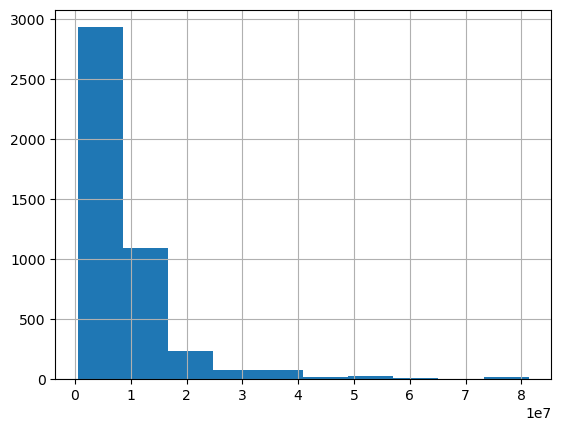

In [11]:
df['Price'].hist()

## Housing category
House prices are binned by 4 categories to visulize price of its surrounding homes.

In [12]:
# Binning median_house_value  
df['housing_category'] = pd.cut(df['Price'], bins=4, labels=['Low', 'Mid', 'High', 'Lavish'])
df

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region,housing_category
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10,Low
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11,Low
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara,Low
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4,Mid
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project,Low
...,...,...,...,...,...,...,...,...,...,...,...
4486,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4487,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4488,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4489,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low


<Axes: xlabel='latitude', ylabel='longitude'>

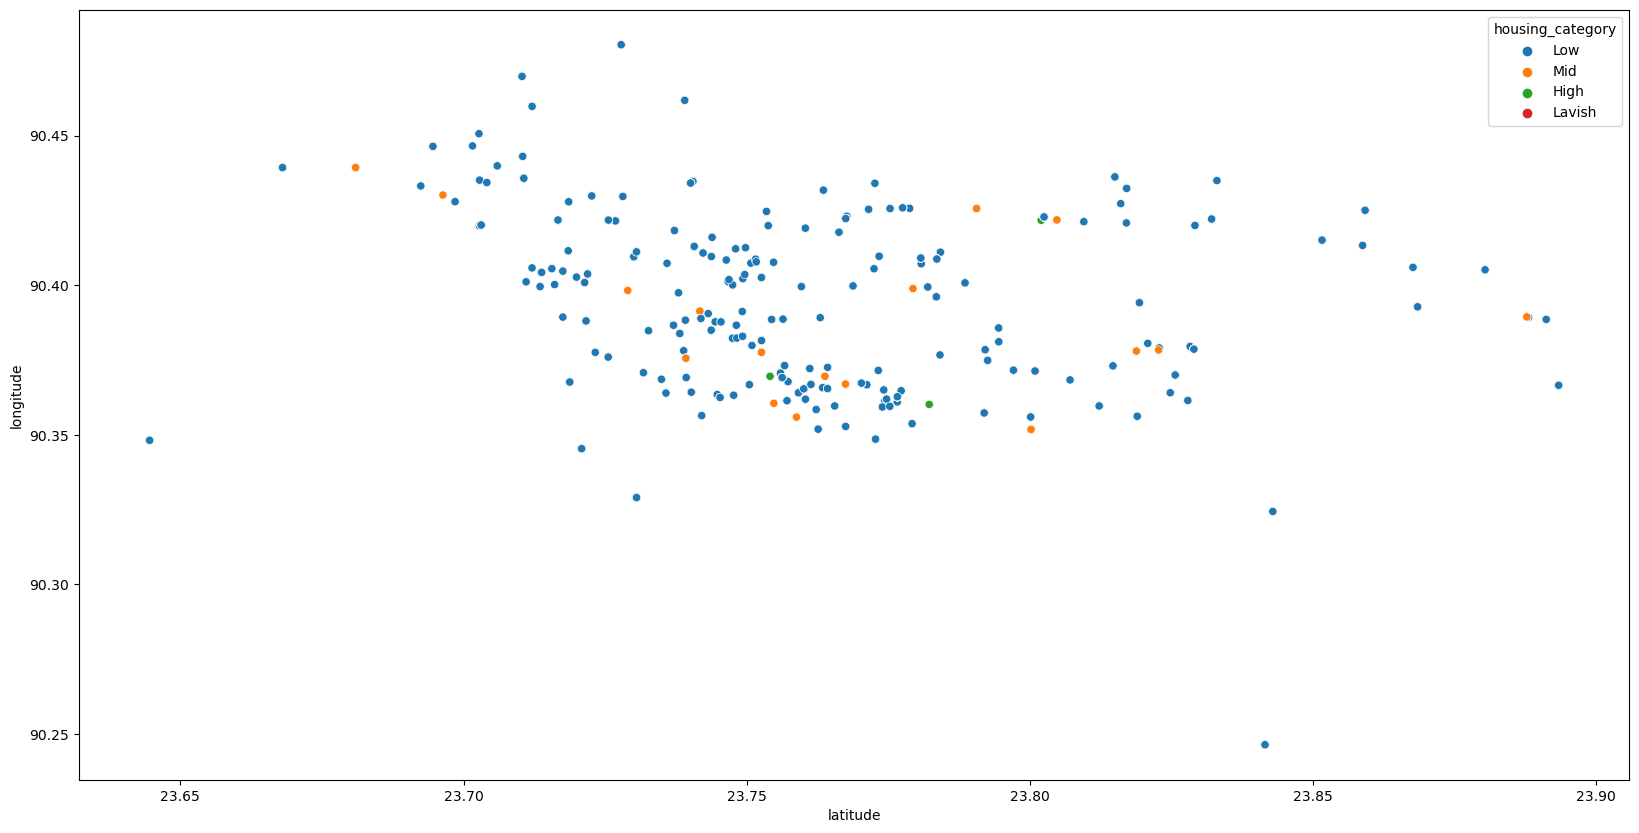

In [13]:
# scatterplot for latitude and longitude
plt.figure(figsize=(20,10))
sns.scatterplot(x='latitude', y='longitude', hue='housing_category', data=df)

In [14]:
# Data frames for each category of houses
dflow = df.loc[df['housing_category']=='Low']
dfmid = df.loc[df['housing_category']=='Mid']
dfhigh = df.loc[df['housing_category']=='High']
dflavish = df.loc[df['housing_category']=='Lavish']

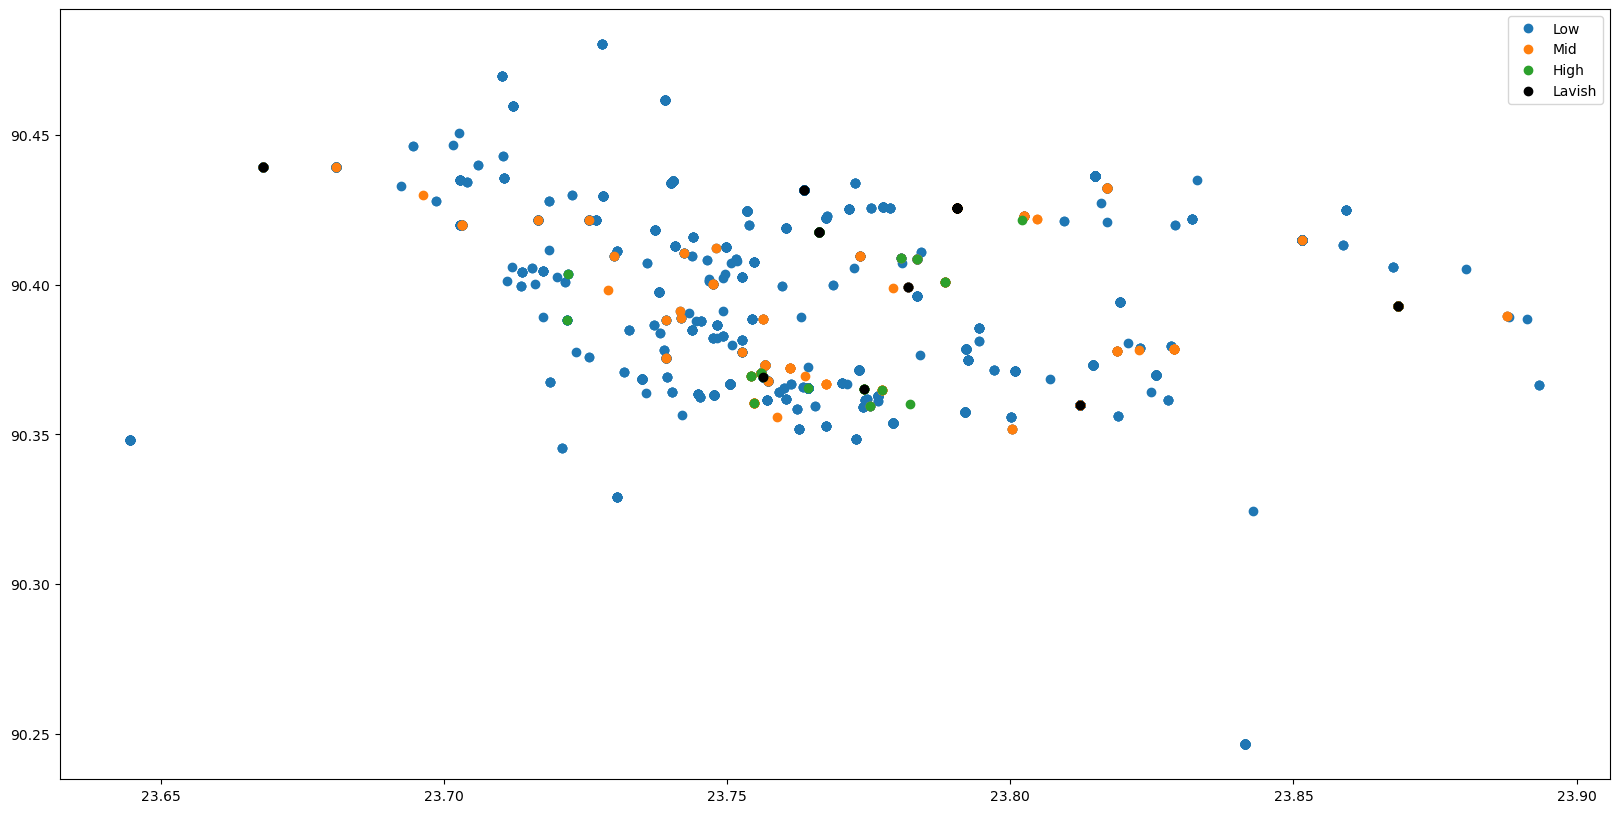

In [15]:
plt.figure(figsize=(20,10))
plt.plot(dflow['latitude'], dflow['longitude'], 'o', label='Low')
plt.plot(dfmid['latitude'], dfmid['longitude'], 'o', label='Mid')
plt.plot(dfhigh['latitude'], dfhigh['longitude'], 'o', label='High')
plt.plot(dflavish['latitude'], dflavish['longitude'], 'ko', label='Lavish')
plt.legend()

<Axes: xlabel='longitude', ylabel='Price'>

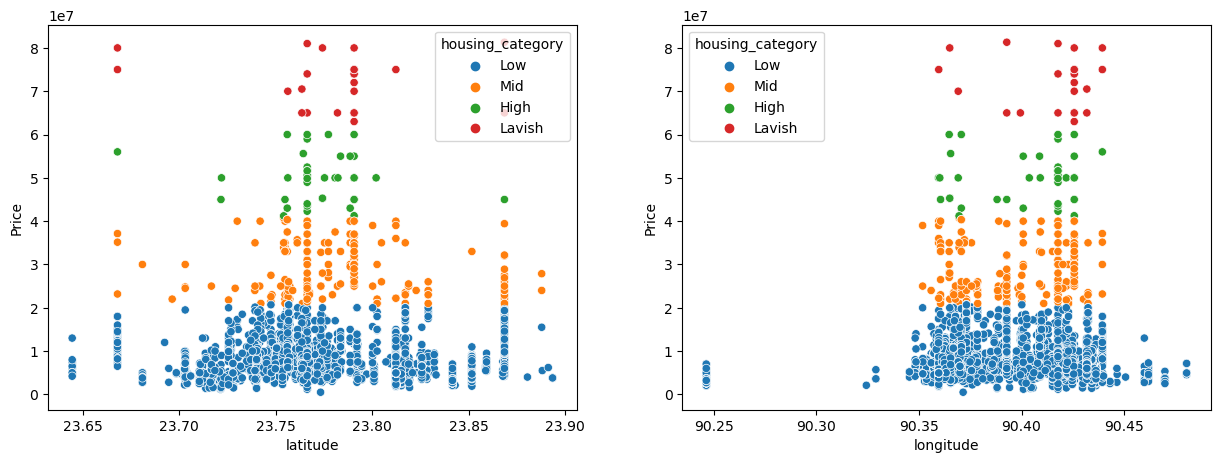

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.scatterplot(x='latitude', y='Price', hue='housing_category', data=df)
plt.subplot(122)
sns.scatterplot(x='longitude', y='Price', hue='housing_category', data=df)

Text(0.5, 0, 'Price')

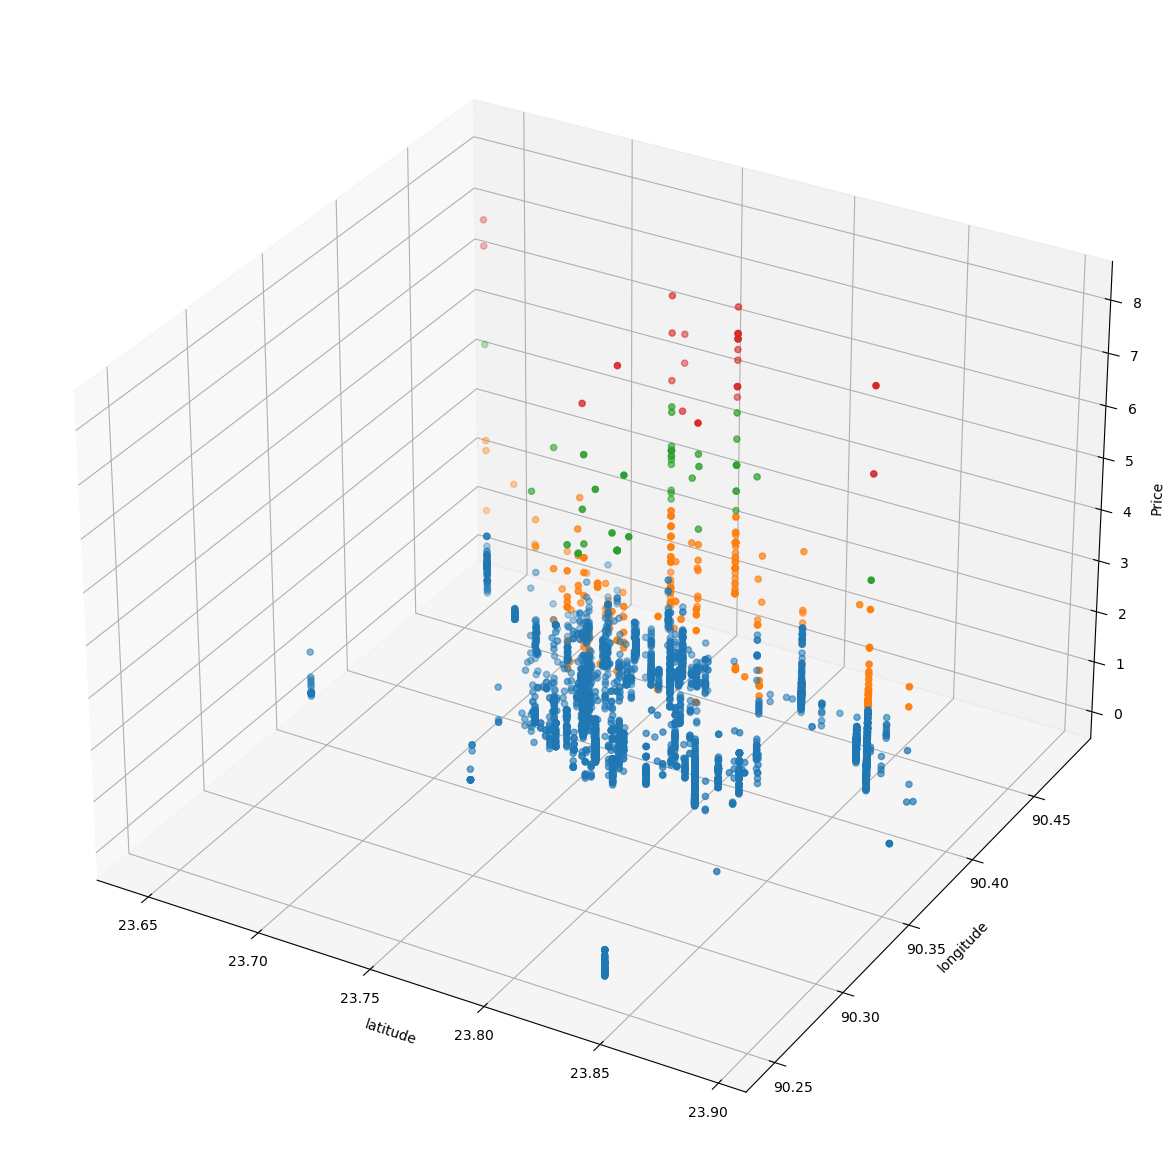

In [17]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(dflow['latitude'], dflow['longitude'], dflow['Price'])
ax.scatter3D(dfmid['latitude'], dfmid['longitude'], dfmid['Price'])
ax.scatter3D(dfhigh['latitude'], dfhigh['longitude'], dfhigh['Price'])
ax.scatter3D(dflavish['latitude'], dflavish['longitude'], dflavish['Price'])
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('Price')

In [18]:
# Take a sample from the total dataset
sample1 = df.loc[(df['latitude']>=23.60) & (df['latitude']<=23.74)]
sample1

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region,housing_category
39,"Majed Sardar Road, Bangshal, Dhaka",1200000,Apartment,2.0,1.0,320,23.721380,90.400910,Bangshal,Majed Sardar Road,Low
40,"Majed Sardar Road, Bangshal, Dhaka",1200000,Apartment,2.0,1.0,320,23.721380,90.400910,Bangshal,Majed Sardar Road,Low
46,"Jurain, Shyampur, Dhaka",22000000,Building,16.0,10.0,5400,23.696360,90.430180,Shyampur,Jurain,Mid
60,"Mahuthtuli, Bangshal, Dhaka",2925000,Apartment,2.0,2.0,650,23.717530,90.404740,Bangshal,Mahuthtuli,Low
73,"Manda, Mugdapara, Dhaka",3200000,Apartment,4.0,2.0,900,23.728130,90.429690,Mugdapara,Manda,Low
...,...,...,...,...,...,...,...,...,...,...,...
4408,"Shiddheswari Lane, Shiddheswari, Dhaka",10000000,Apartment,3.0,3.0,1325,23.737950,90.397490,Shiddheswari,Shiddheswari Lane,Low
4414,"Jigatola, Hazaribag, Dhaka",5500000,Apartment,3.0,2.0,1100,23.739260,90.375630,Hazaribag,Jigatola,Low
4415,"Jigatola, Hazaribag, Dhaka",5500000,Apartment,3.0,2.0,1100,23.739260,90.375630,Hazaribag,Jigatola,Low
4418,"Jigatola, Hazaribag, Dhaka",25000000,Building,8.0,8.0,4500,23.739260,90.375630,Hazaribag,Jigatola,Mid


In [19]:
sample1low = sample1.loc[sample1['housing_category']=='Low']
sample1mid = sample1.loc[sample1['housing_category']=='Mid']
sample1high = sample1.loc[sample1['housing_category']=='High']
sample1lavish = sample1.loc[sample1['housing_category']=='Lavish']

Text(0.5, 0, 'Price')

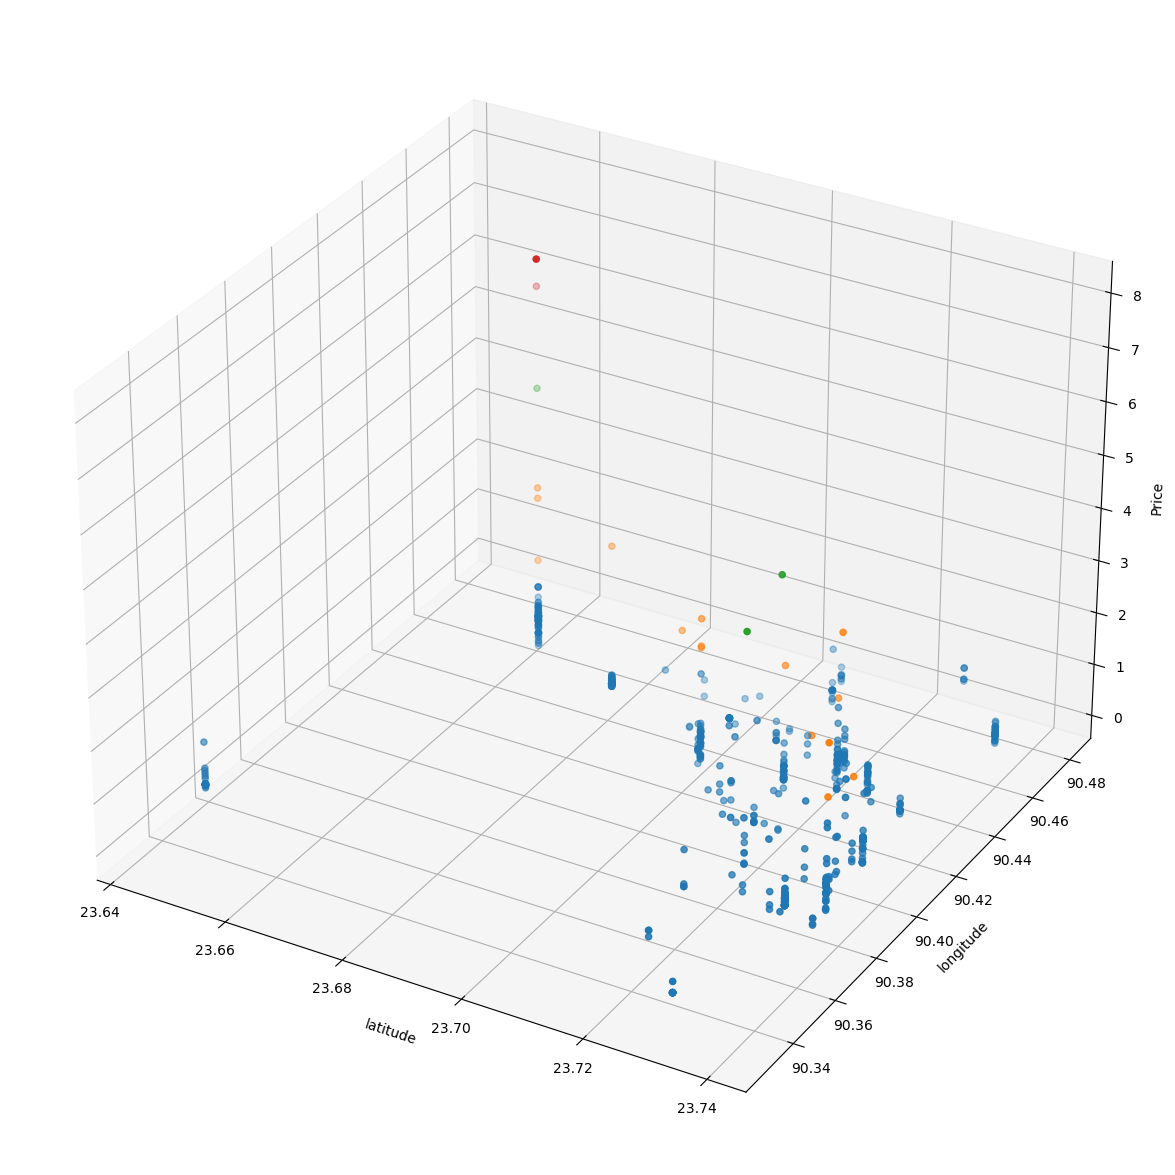

In [37]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(sample1low['latitude'], sample1low['longitude'], sample1low['Price'])
ax.scatter3D(sample1mid['latitude'], sample1mid['longitude'], sample1mid['Price'])
ax.scatter3D(sample1high['latitude'], sample1high['longitude'], sample1high['Price'])
ax.scatter3D(sample1lavish['latitude'], sample1lavish['longitude'], sample1lavish['Price'])
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('Price')

### Find correlation between pairwise features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Location          4491 non-null   object  
 1   Price             4491 non-null   int64   
 2   Type              4491 non-null   object  
 3   No_Beds           4491 non-null   float64 
 4   No_Baths          4491 non-null   float64 
 5   Area              4491 non-null   int64   
 6   latitude          4491 non-null   float64 
 7   longitude         4491 non-null   float64 
 8   Region            4491 non-null   object  
 9   Sub_region        4491 non-null   object  
 10  housing_category  4491 non-null   category
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 355.6+ KB


<Axes: >

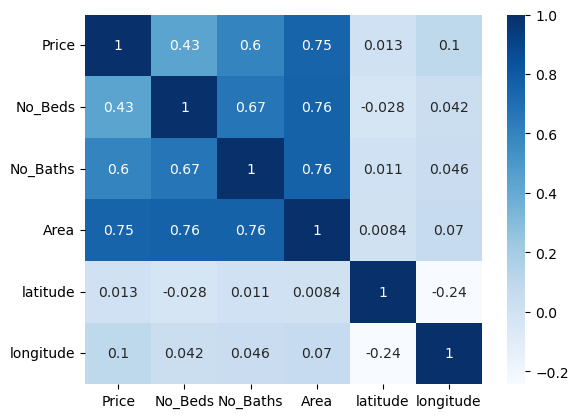

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

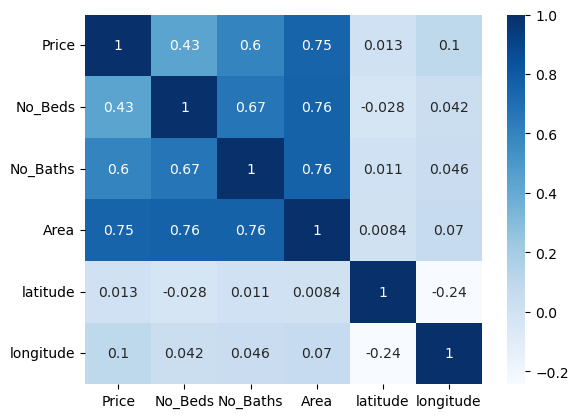

In [22]:
# Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()


<Axes: >

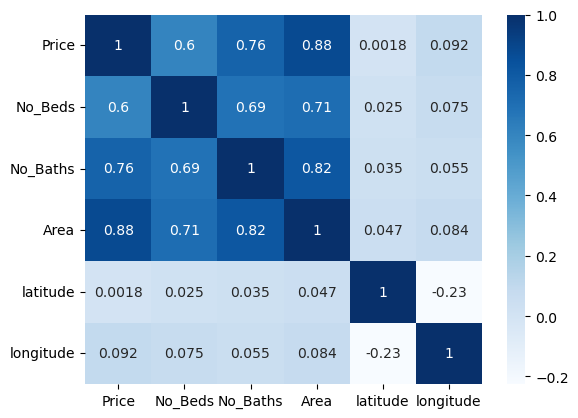

In [23]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

#sns.heatmap(df.corr(method='spearman'), annot=True, cmap='Blues')

<Axes: >

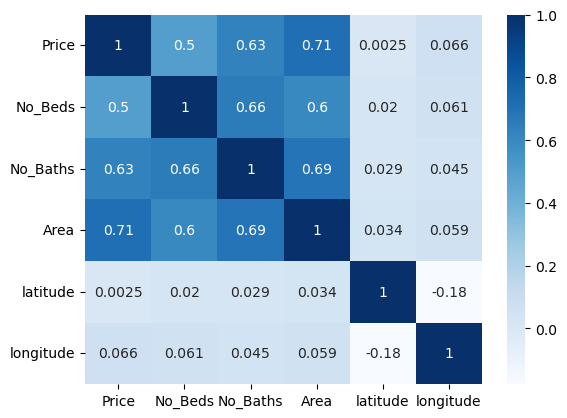

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')

#sns.heatmap(df.corr(method='kendall'), annot=True, cmap='Blues')

## Model


### Select feature and set target



In [25]:
df

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region,housing_category
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10,Low
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11,Low
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara,Low
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4,Mid
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project,Low
...,...,...,...,...,...,...,...,...,...,...,...
4486,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4487,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4488,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4489,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low


In [26]:
X = df.drop(['Price', 'housing_category', 'Location', 'Type', 'Region', 'Sub_region'], axis=1)
y = df['Price']
total_pred = 0
list_pred = [] # For stroing the prediction of all the models

### Split data into train-test sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Scale data

In [28]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[0.04444444, 0.22222222, 0.06356383, 0.45305844, 0.51876229],
       [0.04444444, 0.22222222, 0.03989362, 0.67386062, 0.48397299],
       [0.04444444, 0.22222222, 0.05425532, 0.89984728, 0.62556629],
       ...,
       [0.04444444, 0.11111111, 0.04787234, 0.27819307, 0.67480127],
       [0.04444444, 0.22222222, 0.05319149, 0.44887871, 0.52448927],
       [0.04444444, 0.11111111, 0.02659574, 0.67386062, 0.48397299]])

### KNN Regressor

In [29]:
neigh = KNeighborsRegressor(n_neighbors=10, weights='uniform', algorithm='auto', p=1)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10, p=1)

In [30]:
y_pred_1 = neigh.predict(X_test)
list_pred.append(y_pred_1)
total_pred += y_pred_1

#### Evaluation metric for KNN

In [31]:
mae_knn=mean_absolute_error(y_test, y_pred_1)
mse_knn=mean_squared_error(y_test, y_pred_1)
rmse_knn=math.sqrt(mse_knn)
print(mae_knn, mse_knn, rmse_knn)

2154797.9275118005 18978645843538.008 4356448.765168484


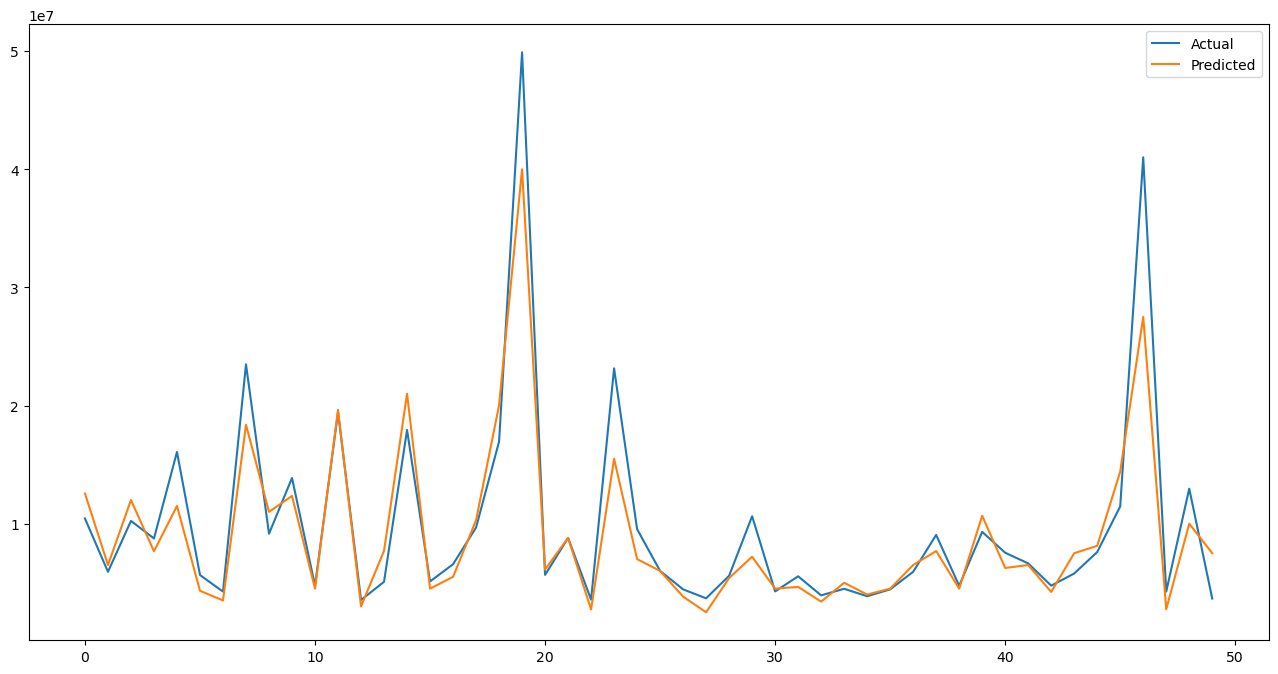

In [36]:
test = pd.DataFrame({'Predicted':y_pred_1,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

###Decision Tree Regressor

In [32]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [33]:
y_pred_2 = regr_1.predict(X_test)
list_pred.append(y_pred_2)
total_pred += y_pred_2

#### Evaluation metric for DecisionTree

In [34]:
mae_dt=mean_absolute_error(y_test, y_pred_2)
mse_dt=mean_squared_error(y_test, y_pred_2)
rmse_dt=math.sqrt(mse_dt)
print(mae_dt, mse_dt, rmse_dt)

1851489.7488201894 19821282963559.844 4452109.945133862


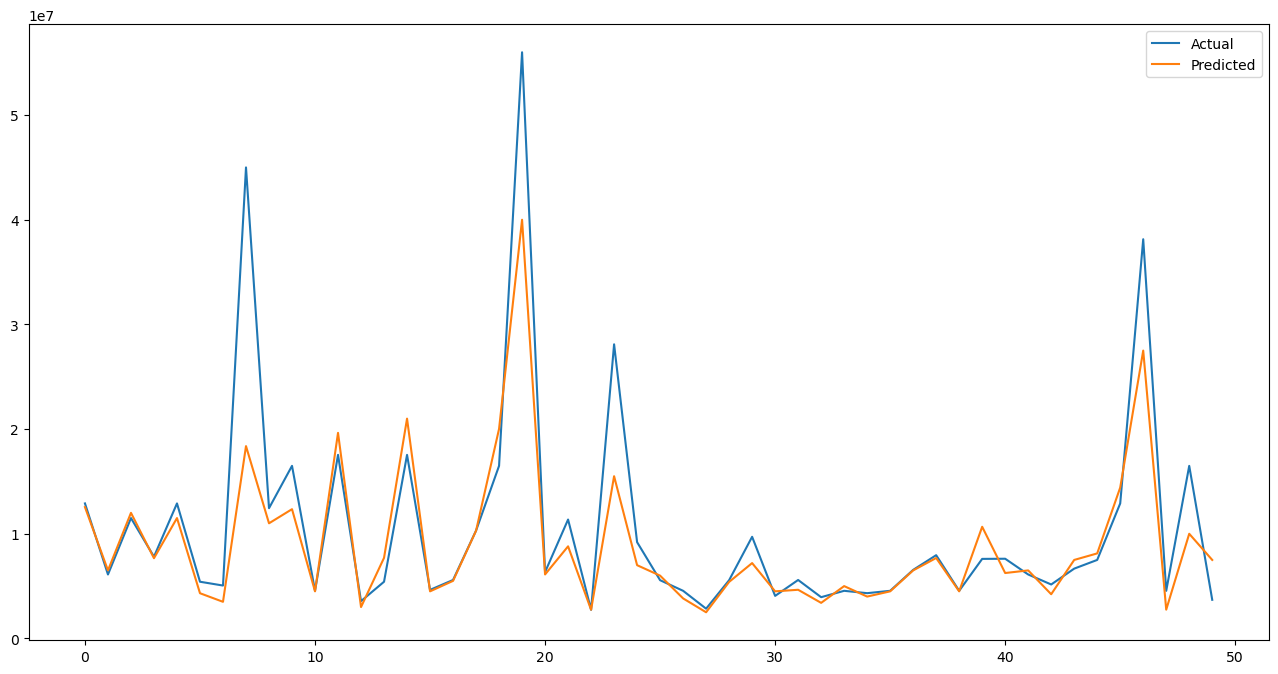

In [37]:
test = pd.DataFrame({'Predicted':y_pred_2,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### Adaboost Regressor

In [38]:
regr_2 = AdaBoostRegressor(n_estimators=50, learning_rate=0.3, loss='exponential')
regr_2.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.3, loss='exponential')

In [39]:
y_pred_3 = regr_2.predict(X_test)
list_pred.append(y_pred_3)
total_pred += y_pred_3

#### Evaluation metric for AdaBoost

In [40]:
mae_ad=mean_absolute_error(y_test, y_pred_3)
mse_ad=mean_squared_error(y_test, y_pred_3)
rmse_ad=math.sqrt(mse_ad)
print(mae_ad, mse_ad, rmse_ad)

2641029.488324705 19413689010518.457 4406096.799948732


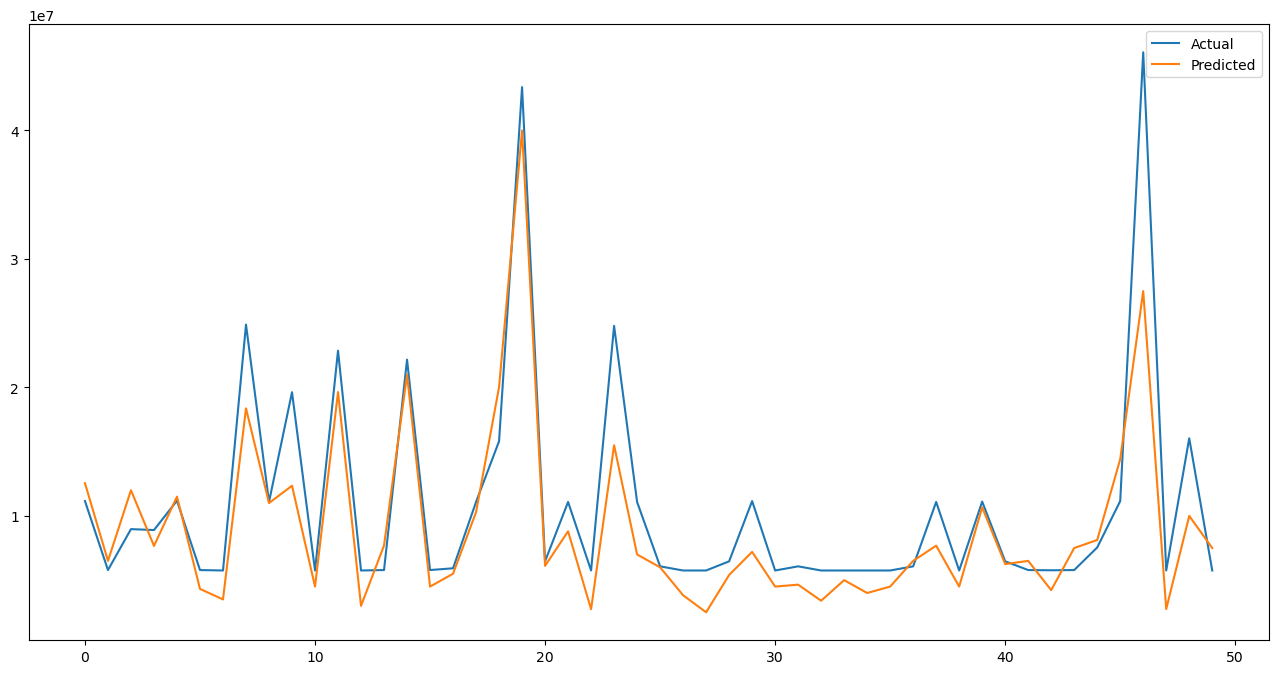

In [41]:
test = pd.DataFrame({'Predicted':y_pred_3,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

### RandomForestRegressor

In [42]:
regr_3 = RandomForestRegressor()
regr_3.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_pred_4 = regr_3.predict(X_test)
list_pred.append(y_pred_4)
total_pred += y_pred_4

#### Evaluation metric for RandomForest

In [44]:
mae_rf=mean_absolute_error(y_test, y_pred_4)
mse_rf=mean_squared_error(y_test, y_pred_4)
rmse_rf=math.sqrt(mse_rf)
print(mae_rf, mse_rf, rmse_rf)

1484214.931082831 12065565909060.816 3473552.3472463773


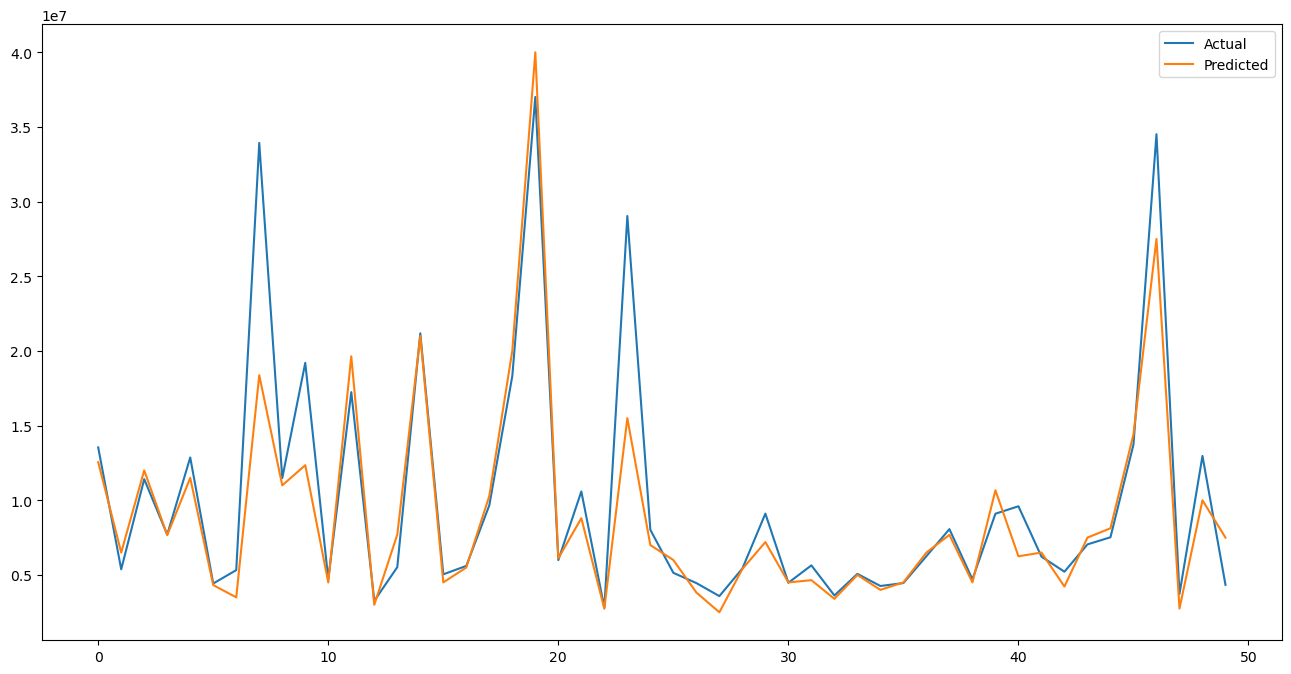

In [45]:
test = pd.DataFrame({'Predicted':y_pred_4,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])

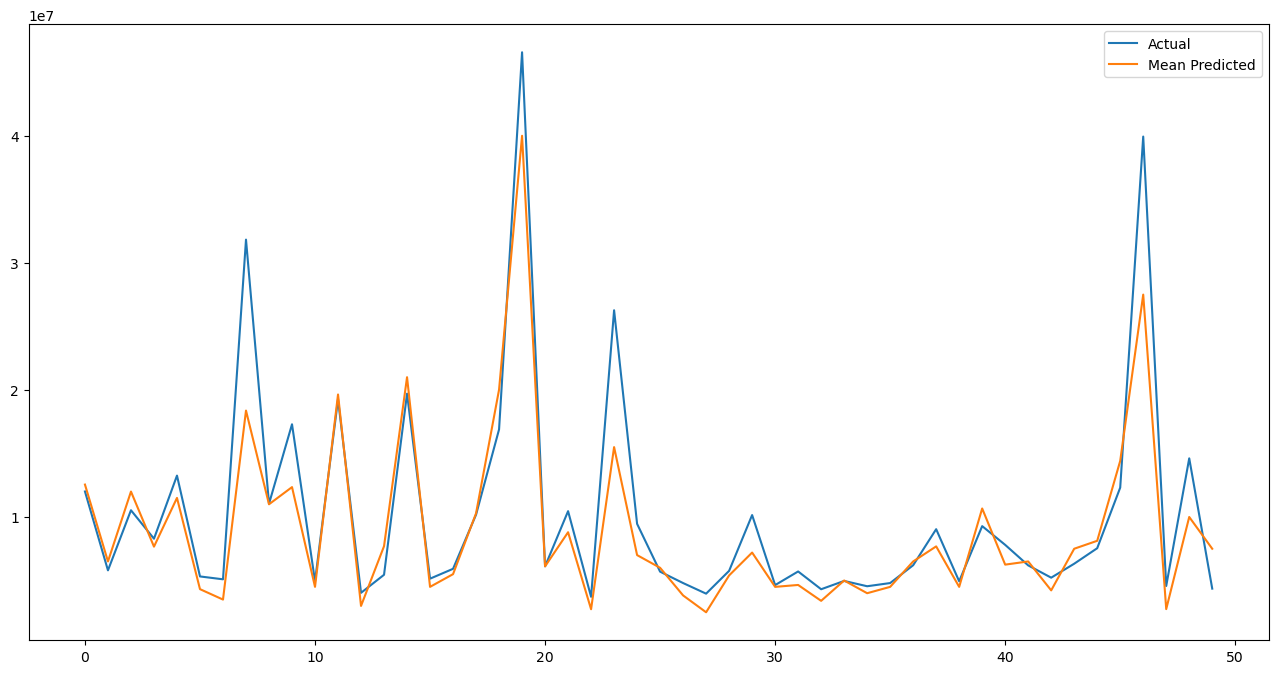

In [46]:
# Mean of all model predictions
mean_pred = total_pred/4
test = pd.DataFrame({'Predicted':mean_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Mean Predicted'])

In [47]:
mae_mean=mean_absolute_error(y_test, mean_pred)
mse_mean=mean_squared_error(y_test, mean_pred)
rmse_mean=math.sqrt(mse_mean)
print(mae_mean, mse_mean, rmse_mean)

1847754.3505661264 13955374655280.6 3735689.3146085637


In [48]:
df

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region,housing_category
0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300,23.86846,90.39280,Uttara,Sector 10,Low
1,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456,23.81223,90.35967,Mirpur,Section 11,Low
2,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550,23.75349,90.42469,Khilgaon,Chowdhuripara,Low
3,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669,23.78855,90.40081,Banani,Road No 4,Mid
4,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835,23.76354,90.43180,Banasree,South Banasree Project,Low
...,...,...,...,...,...,...,...,...,...,...,...
4486,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4487,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4488,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low
4489,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100,23.81223,90.35967,Mirpur,Middle Monipur,Low


In [49]:
X

,No_Beds,No_Baths,Area,latitude,longitude
0,3.0,3.0,1300,23.86846,90.39280
1,4.0,4.0,1456,23.81223,90.35967
2,3.0,3.0,1550,23.75349,90.42469
3,3.0,3.0,2669,23.78855,90.40081
4,2.0,2.0,835,23.76354,90.43180
...,...,...,...,...,...
4486,3.0,2.0,1100,23.81223,90.35967
4487,3.0,2.0,1100,23.81223,90.35967
4488,3.0,2.0,1100,23.81223,90.35967
4489,3.0,2.0,1100,23.81223,90.35967


In [50]:
y

0        7500000
1        7280000
2       13000000
3       37000000
4        3600000
          ...   
4486     4950000
4487     4950000
4488     4950000
4489     4950000
4490     4950000
Name: Price, Length: 4491, dtype: int64

In [51]:
sample1

,Location,Price,Type,No_Beds,No_Baths,Area,latitude,longitude,Region,Sub_region,housing_category
39,"Majed Sardar Road, Bangshal, Dhaka",1200000,Apartment,2.0,1.0,320,23.721380,90.400910,Bangshal,Majed Sardar Road,Low
40,"Majed Sardar Road, Bangshal, Dhaka",1200000,Apartment,2.0,1.0,320,23.721380,90.400910,Bangshal,Majed Sardar Road,Low
46,"Jurain, Shyampur, Dhaka",22000000,Building,16.0,10.0,5400,23.696360,90.430180,Shyampur,Jurain,Mid
60,"Mahuthtuli, Bangshal, Dhaka",2925000,Apartment,2.0,2.0,650,23.717530,90.404740,Bangshal,Mahuthtuli,Low
73,"Manda, Mugdapara, Dhaka",3200000,Apartment,4.0,2.0,900,23.728130,90.429690,Mugdapara,Manda,Low
...,...,...,...,...,...,...,...,...,...,...,...
4408,"Shiddheswari Lane, Shiddheswari, Dhaka",10000000,Apartment,3.0,3.0,1325,23.737950,90.397490,Shiddheswari,Shiddheswari Lane,Low
4414,"Jigatola, Hazaribag, Dhaka",5500000,Apartment,3.0,2.0,1100,23.739260,90.375630,Hazaribag,Jigatola,Low
4415,"Jigatola, Hazaribag, Dhaka",5500000,Apartment,3.0,2.0,1100,23.739260,90.375630,Hazaribag,Jigatola,Low
4418,"Jigatola, Hazaribag, Dhaka",25000000,Building,8.0,8.0,4500,23.739260,90.375630,Hazaribag,Jigatola,Mid
